In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Random forest example

In [2]:
d = pd.read_csv('data/ecoli.csv')
d['label'] = 0
d.loc[d['class'] == 'pp', 'label'] = 1
del d['class']
print(d.label.value_counts())
d[:5]

0    284
1     52
Name: label, dtype: int64


,mcg,gvh,lip,chg,aac,alm1,alm2,label
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,0
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,0
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,0
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,0
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,0


In [3]:
label = d.label.copy()
train = d.copy()
del train['label']

In [4]:
roc_auc_not_inverted = []
for i in range(1000):
    model = RandomForestClassifier(n_estimators=10, max_depth=2)
    model.fit(train, label)
    pred = model.predict_proba(train)[:,1]
    roc_auc_not_inverted.append(roc_auc_score(label, pred))

The result is different every time:

In [5]:
roc_auc_not_inverted[:10]

[0.96800514626218859,
 0.948943661971831,
 0.9610306067172264,
 0.96644772481040087,
 0.96279117009750814,
 0.97294826652221023,
 0.96279117009750814,
 0.96428087757313108,
 0.95270178764897073,
 0.9743025460455037]

## Inverted labels:

In [6]:
label = 1 + -1*label

In [7]:
roc_auc_inverted = []
for i in range(1000):
    model = RandomForestClassifier(n_estimators=10, max_depth=2)
    model.fit(train, label)
    pred = model.predict_proba(train)[:,1]
    roc_auc_inverted.append(roc_auc_score(label, pred))

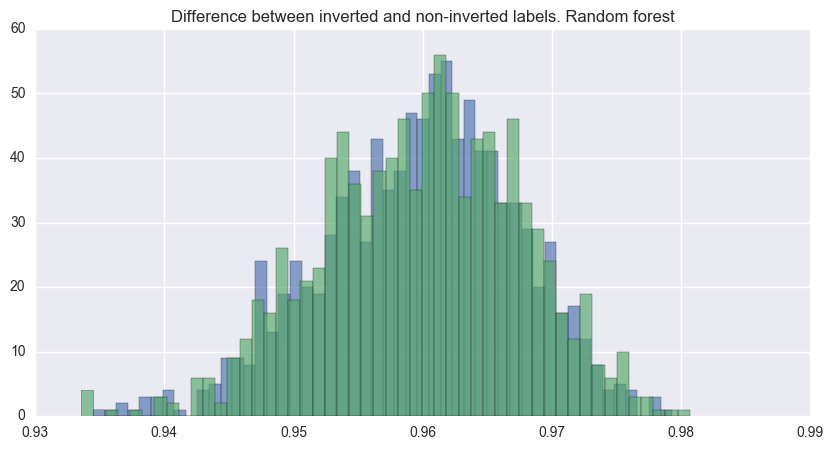

In [8]:
f = plt.figure(figsize=(10,5))
plt.hist(roc_auc_not_inverted, bins=50, alpha=0.65, figure=f)
plt.hist(roc_auc_inverted, bins=50, alpha=0.65, figure=f)
plt.title('Difference between inverted and non-inverted labels. Random forest')

# The same for AdaBoost:

In [9]:
roc_auc_not_inverted = []
for i in range(100):
    model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=5)
    model.fit(train, label)
    pred = model.predict_proba(train)[:,1]
    roc_auc_not_inverted.append(roc_auc_score(label, pred))

In [10]:
label = 1 + -1*label

In [11]:
roc_auc_inverted = []
for i in range(100):
    model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=5)
    model.fit(train, label)
    pred = model.predict_proba(train)[:,1]
    roc_auc_inverted.append(roc_auc_score(label, pred))

In [12]:
set(roc_auc_not_inverted)

{0.99377031419284945}

In [13]:
set(roc_auc_inverted)

{0.99377031419284945}

# Random forest with random_state

In [14]:
roc_auc_not_inverted = []
for i in range(1000):
    model = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=777)
    model.fit(train, label)
    pred = model.predict_proba(train)[:,1]
    roc_auc_not_inverted.append(roc_auc_score(label, pred))

In [15]:
label = 1 + -1*label

In [16]:
roc_auc_inverted = []
for i in range(1000):
    model = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=777)
    model.fit(train, label)
    pred = model.predict_proba(train)[:,1]
    roc_auc_inverted.append(roc_auc_score(label, pred))

In [17]:
set(roc_auc_not_inverted)

{0.95361592632719405}

In [18]:
set(roc_auc_inverted)

{0.95361592632719394}